In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

Wikipedia page for Peyton Manning.

In [3]:
df = pd.read_csv('example_wp_peyton_manning.csv')
df[:3]

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582


In [4]:
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df);

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200900,7.510520,8.901077
3266,2017-01-16,8.525905,7.805351,9.256539
3267,2017-01-17,8.313265,7.546613,9.056057
3268,2017-01-18,8.145861,7.374899,8.874073
3269,2017-01-19,8.157749,7.405570,8.864253


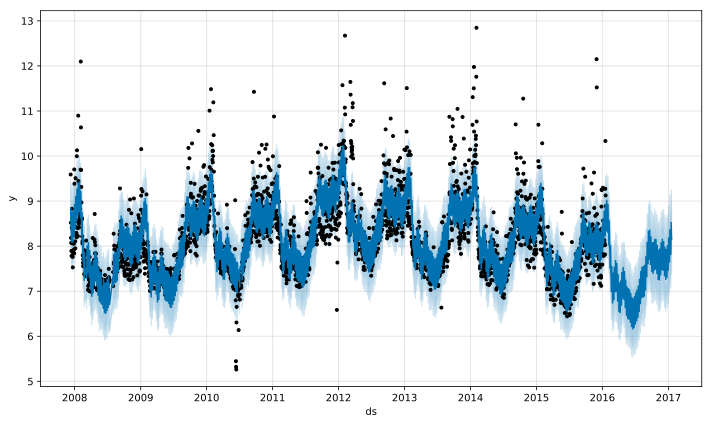

In [8]:
m.plot(forecast);

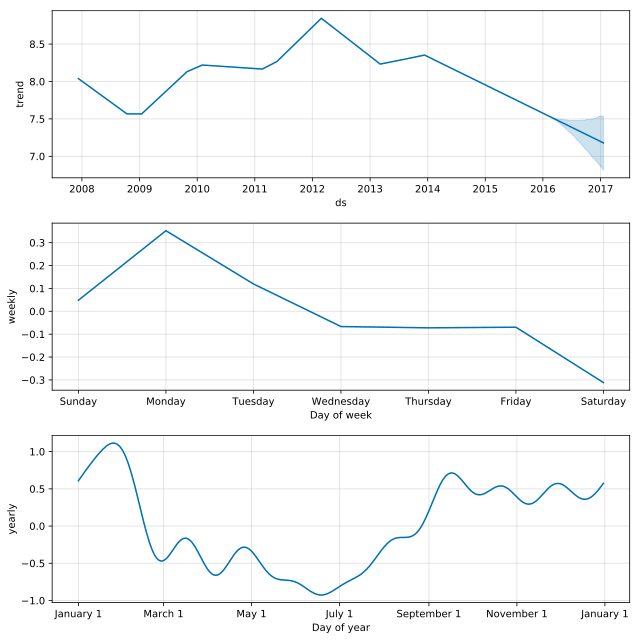

In [9]:
m.plot_components(forecast);